In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
# Download NLTK stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aishwarya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
# Load data
data = pd.read_csv("IMDB Dataset.csv")

In [4]:
# Clean and preprocess text
stemmer = SnowballStemmer("english")
stopword = set(stopwords.words('english'))

In [7]:
import string

def clean(text):
    text = re.sub('\[.*?\]', '', str(text).lower())
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [stemmer.stem(word) for word in text.split() if word not in stopword]
    return " ".join(text)

data["review"] = data["review"].apply(clean)

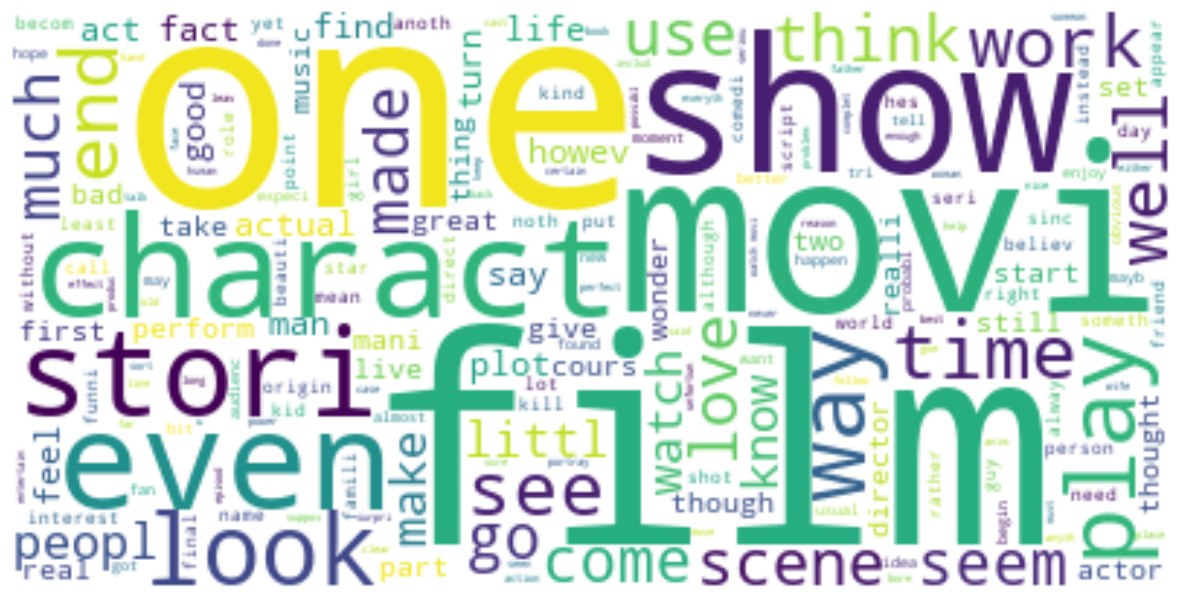

In [8]:
# Create Word Cloud
text = " ".join(data.review)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
# Split data and vectorize
x = np.array(data["review"])
y = np.array(data["sentiment"])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
# Train model
model = PassiveAggressiveClassifier()
model.fit(X_train, y_train)

PassiveAggressiveClassifier()

In [14]:
# Predict sentiment
user_input = input("Enter a Text: ")
user_data = cv.transform([user_input]).toarray()
output = model.predict(user_data)
print(output)

['negative']
